In [1]:
from core.preprocessing import DataManager, make_index_sequential, retrend_data
from core.arima_models import SumToSumARIMA
from core.utilities import plot_forecasts, calc_test_mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', context='talk')
from time import time

/Users/bennetmeyers/.virtualenvs/sc/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ARIMA function requires a sequential time index. So, we will load the small train and dev sets with "reindexing" turned on. This 

In [2]:
dm = DataManager()
dm.load_all_and_split(reindex=True)

In [3]:
prob = SumToSumARIMA(df=dm.detrended_train)

In [4]:
ti = time()
prob.train(order=(1,1,0))
tf = time()
print('training took {:1f} seconds'.format(tf - ti))

training took 1.424935 seconds


In [5]:
ti = time()
prob.test(dm.detrended_dev['total_power'])
tf = time()
print('testing took {:1f} seconds'.format(tf - ti))

testing took 2.570687 seconds


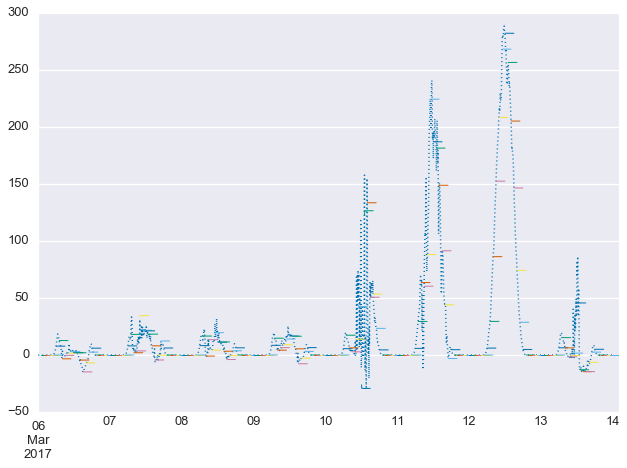

In [6]:
prob.plot_test()
#ax = plt.gca()
#lim = ax.get_xlim()
#chunk = (lim[1] - lim[0])/8.
#start = lim[0] + 2*chunk
#end = lim[0] + 6*chunk
#ax.set_xlim(start, end)

Transform back to Power from devation from clear sky.

In [7]:
dm.add_forecasts(prob.forecasts)
dm.swap_index()

In [8]:
transformed_forecasts = [retrend_data(f) for f in dm.forecasts]

In [9]:
dm.add_forecasts(transformed_forecasts)
dm.swap_index()

(24815518.75, 24821276.25)

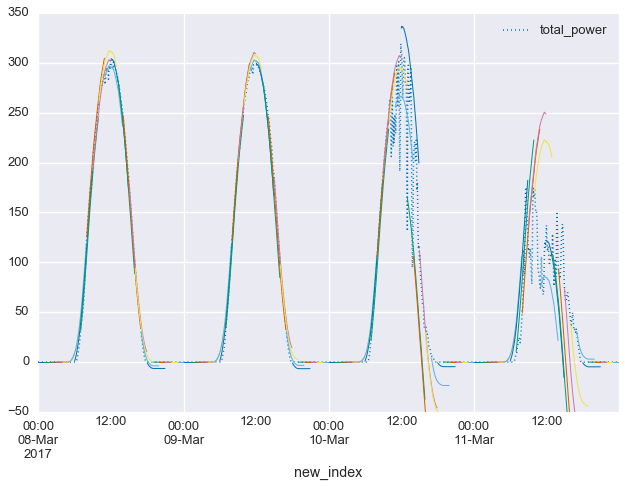

In [10]:
plot_forecasts(dm.original_dev, dm.forecasts)
ax = plt.gca()
lim = ax.get_xlim()
chunk = (lim[1] - lim[0])/8.
start = lim[0] + 2*chunk
end = lim[0] + 6*chunk
ax.set_ylim(-50, 350)
ax.set_xlim(start, end)

In [11]:
calc_test_mse(dm.original_dev, dm.forecasts)

1592.288834865089